In [1]:
import numpy as np
import pandas as pd
import os

### Read data 

In [2]:
train = pd.read_csv("train.csv")

In [3]:
test = pd.read_csv("test.csv")

In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
import sklearn

In [7]:
from sklearn import preprocessing as pp

In [8]:
from sklearn import cross_validation as cv
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier

C:\Users\tony\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [11]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
train[(train.Sex == 'female') & (train.Survived == 0) & (train.Pclass < 2)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S


In [14]:
train.shape

(891, 12)

In [15]:
train.drop(["Ticket","Cabin", "Embarked"], axis= 1, inplace=True)
test.drop(["Ticket","Cabin", "Embarked"], axis= 1, inplace=True)

In [16]:
train.drop("Name", axis= 1, inplace=True)
test.drop("Name", axis= 1, inplace=True)

In [17]:
gender_mapping = {'female':0, 'male':1}
train['Sex'] = train['Sex'].map(gender_mapping)
test['Sex'] = test['Sex'].map(gender_mapping)

In [18]:
train.shape

(891, 8)

In [19]:
train.dropna(inplace=True)


In [20]:
train.shape

(714, 8)

In [21]:
y = train.Survived
train.drop("Survived", axis= 1, inplace=True)

In [22]:
train.shape

(714, 7)

In [23]:
X = train
Xt = test

In [24]:
X.shape

(714, 7)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.4, random_state = 9)

In [26]:
knn = KNeighborsClassifier(n_neighbors=20)

In [27]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,1,22.0,1,0,7.2500
1,2,1,0,38.0,1,0,71.2833
2,3,3,0,26.0,0,0,7.9250
3,4,1,0,35.0,1,0,53.1000
4,5,3,1,35.0,0,0,8.0500


In [28]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

In [29]:
X_test.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000
mean,431.961538,2.265734,0.664336,29.432692,0.541958,0.416084,33.756032
std,266.632861,0.833097,0.473050,14.762032,0.996479,0.819683,55.566804
min,3.000000,1.000000,0.000000,0.750000,0.000000,0.000000,0.000000
25%,185.750000,2.000000,0.000000,20.000000,0.000000,0.000000,8.050000
50%,419.500000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,678.250000,3.000000,1.000000,37.000000,1.000000,1.000000,33.362475
max,888.000000,3.000000,1.000000,74.000000,5.000000,5.000000,512.329200


In [30]:
X_train.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
count,428.000000,428.00000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,459.689252,2.21729,0.614486,29.877150,0.492991,0.441589,35.321631
std,253.682811,0.84209,0.487286,14.381573,0.883069,0.875826,51.129822
min,1.000000,1.00000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,251.500000,1.00000,0.000000,21.000000,0.000000,0.000000,8.050000
50%,460.000000,2.00000,1.000000,28.000000,0.000000,0.000000,16.100000
75%,677.250000,3.00000,1.000000,39.000000,1.000000,1.000000,33.125000
max,891.000000,3.00000,1.000000,80.000000,5.000000,6.000000,512.329200


In [31]:
y_pred = knn.predict(X_test)

In [32]:
metrics.accuracy_score(y_test, y_pred)

0.62937062937062938

In [33]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_test_pred_logreg = logreg.predict(X_test)
metrics.accuracy_score(y_test, y_test_pred_logreg)

0.78671328671328666

In [34]:
from sklearn.svm import SVC

In [35]:
svc_model = SVC(degree=1)

In [36]:
svc_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=1, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [37]:
y_test_pred_svc = svc_model.predict(X_test)

In [38]:
metrics.accuracy_score(y_test, y_test_pred_svc)

0.59790209790209792

## Final training and predicting on testing data

In [39]:
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,1,34.5,0,0,7.8292
1,893,3,0,47.0,1,0,7.0000
2,894,2,1,62.0,0,0,9.6875
3,895,3,1,27.0,0,0,8.6625
4,896,3,0,22.0,1,1,12.2875
5,897,3,1,14.0,0,0,9.2250
6,898,3,0,30.0,0,0,7.6292
7,899,2,1,26.0,1,1,29.0000
8,900,3,0,18.0,0,0,7.2292
9,901,3,1,21.0,2,0,24.1500


In [41]:
test.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,0.636364,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,0.481622,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,1.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,1.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200


In [42]:
test.Age.mean()

30.272590361445783

In [43]:
test.fillna(inplace=True, axis=1, value=test.Age.mean())

In [44]:
test.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.636364,30.272590,0.447368,0.392344,35.614378
std,120.810458,0.841838,0.481622,12.634534,0.896760,0.981429,55.841115
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,1.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,1.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200


In [45]:
X_ = test

In [46]:
y_ = logreg.predict(X_)

In [47]:
y_results = pd.DataFrame()

In [48]:
y_results["PassengerId"] = X_["PassengerId"]

In [49]:
y_results["Survived"] = pd.DataFrame(y_)

In [50]:
y_results

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [51]:
y_results.to_csv("titanic_results_01.csv", encoding='utf-8', index=False)

##  Trying out Decision Trees

In [52]:
from sklearn import tree

In [53]:
tree1 = tree.DecisionTreeClassifier()

In [54]:
tree1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [55]:
y_test_tree1 = tree1.predict(X_test)

In [56]:
metrics.accuracy_score(y_test, y_test_tree1)

0.72027972027972031

##### final training

In [69]:
tree1.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [70]:
y_ = tree1.predict(X_)
y_results = pd.DataFrame()
y_results["PassengerId"] = X_["PassengerId"]
y_results["Survived"] = pd.DataFrame(y_)

In [71]:
y_results.to_csv("titanic_results_03.csv", encoding='utf-8', index=False)

### Visualize the tree 

In [64]:
import pydotplus
from IPython.display import Image

In [65]:
dot_data = tree.export_graphviz(tree1, out_file="tree1.dot", 
                                feature_names=X_.columns, filled=True, rounded=True,
                                special_characters=True)

In [66]:
graph = pydotplus.graph_from_dot_file('tree1.dot')

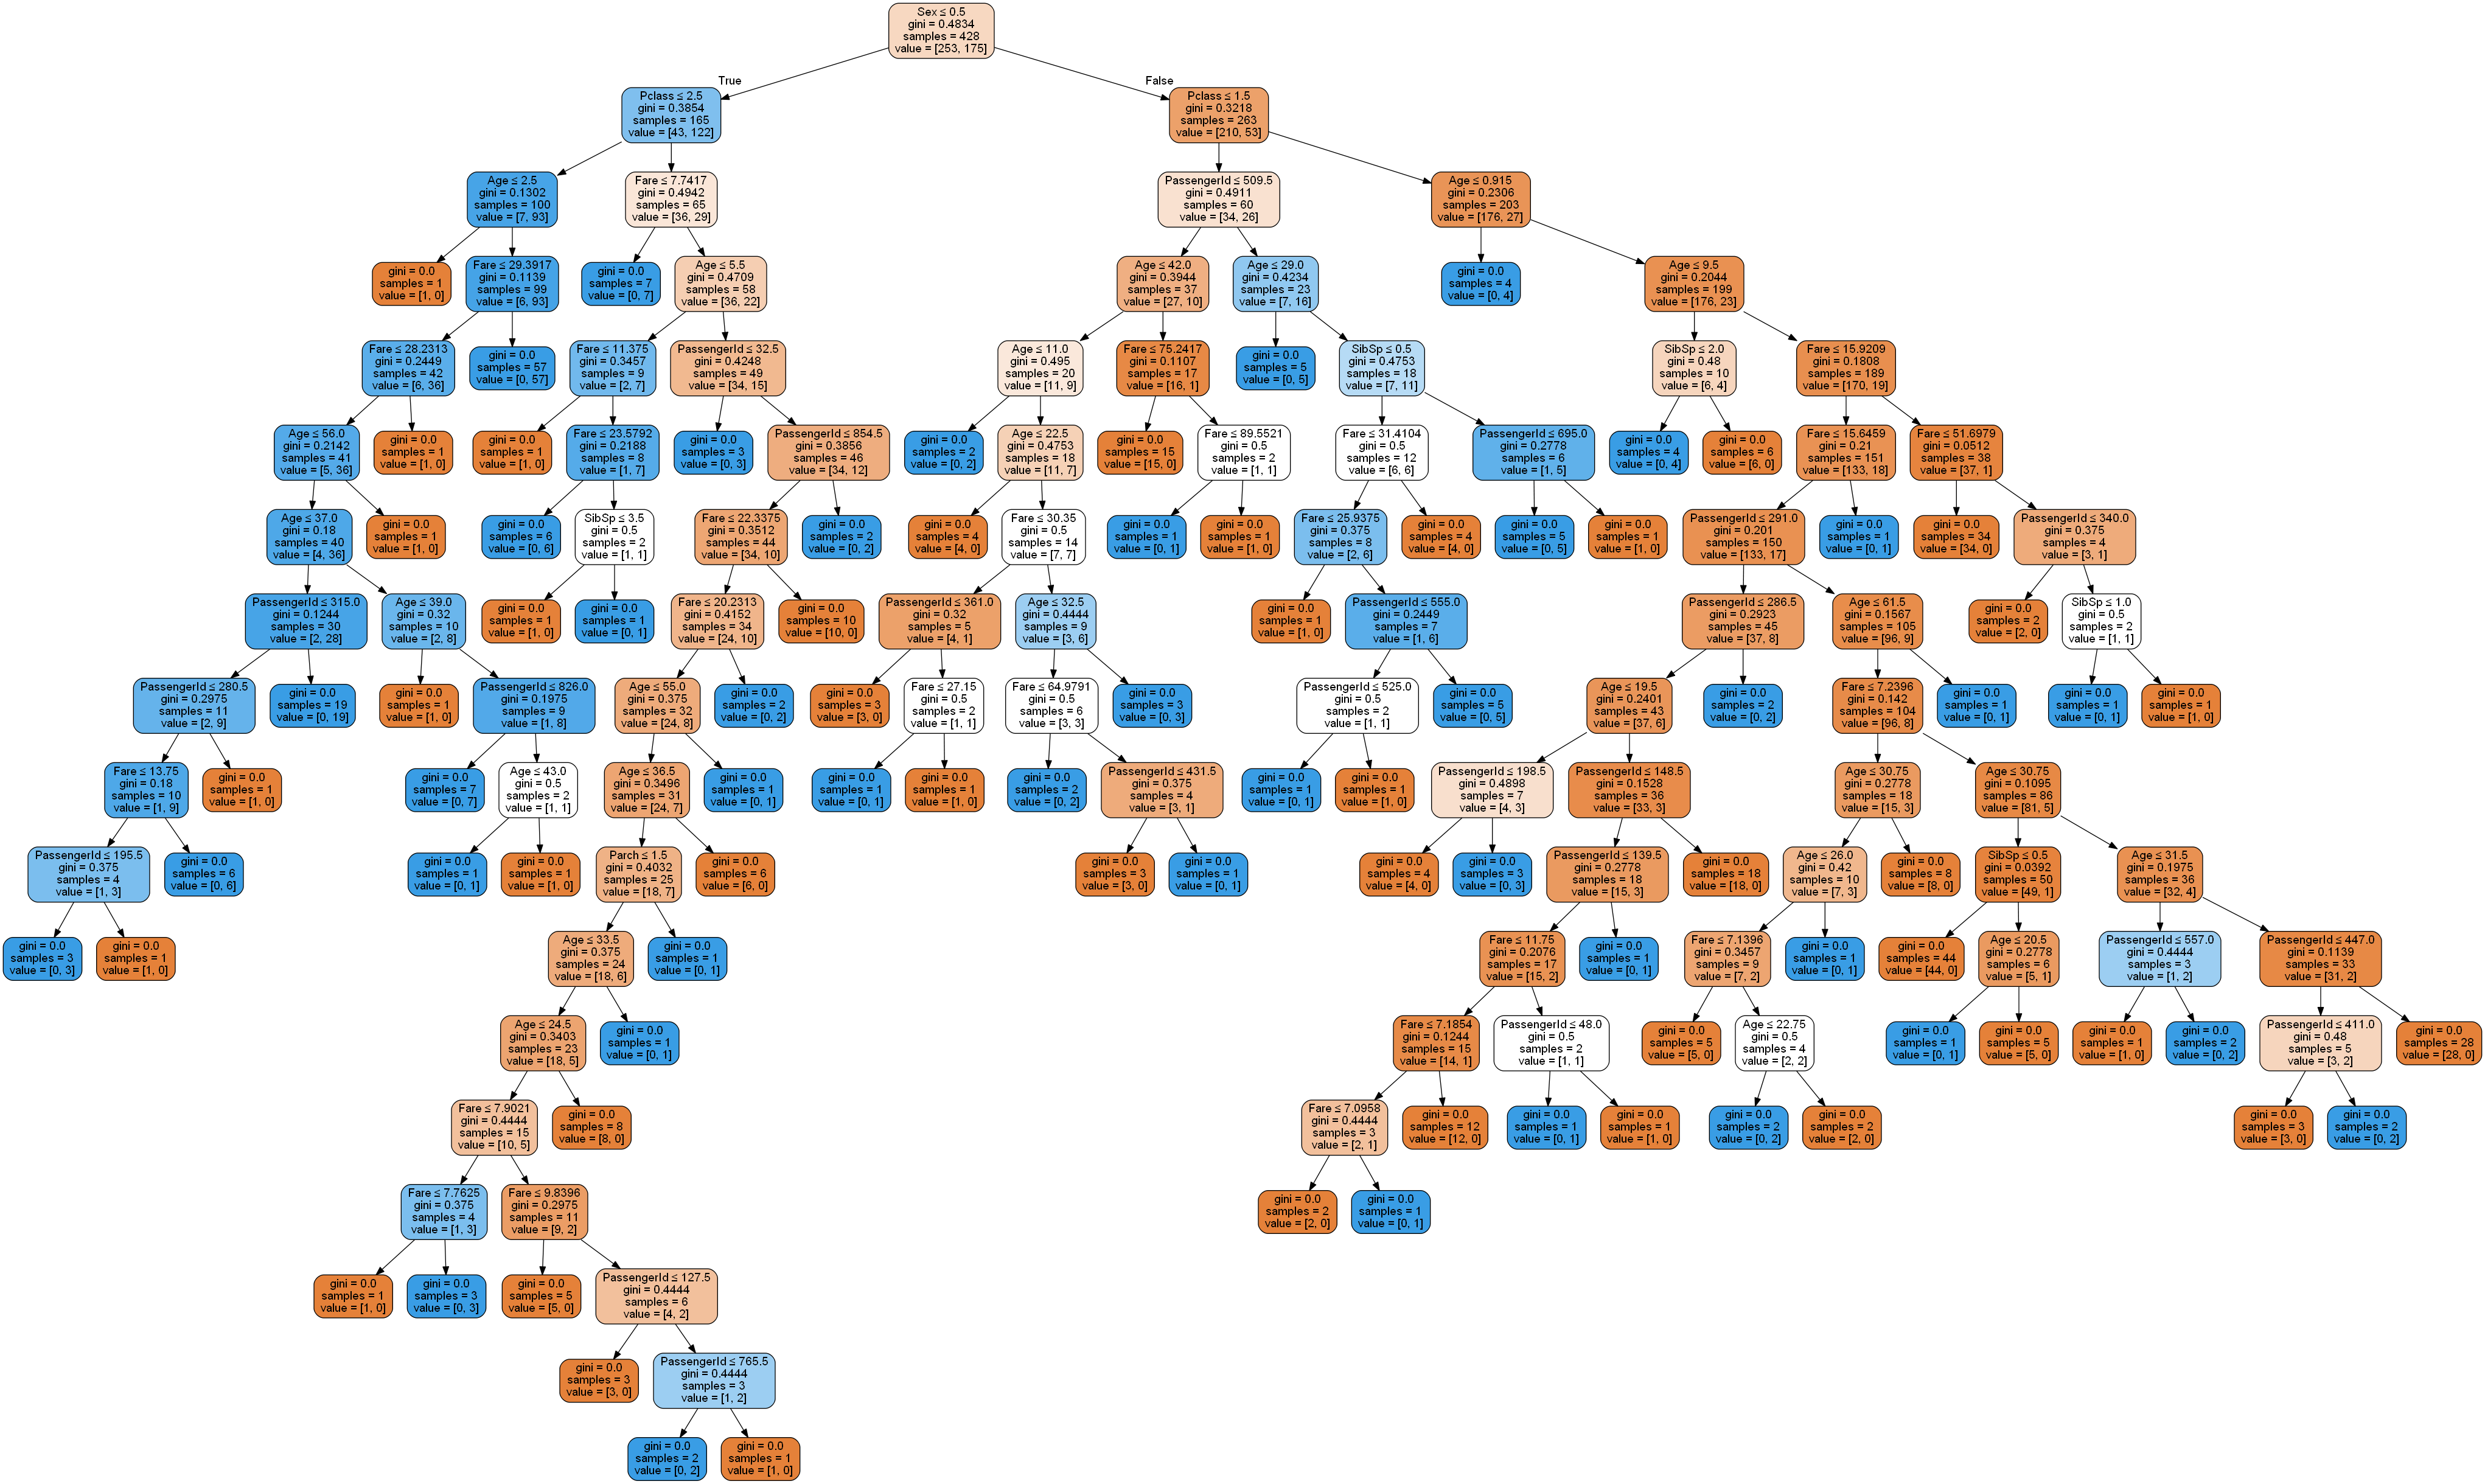

In [67]:
Image(graph.create_png())